# Exploratory Data Analytics on Jobs and Salaries #

## 1. Introduction ##

#### 1.1 Sypnosis ####

In this exploratory data analysis (EDA) project, we aim to gain insights into job titles and salaries within the data science field. Our specific objectives include:

> *  **Exploring the Distribution of Salaries:** How do salaries vary across different job titles, experience levels, and company sizes?

> * **Identifying Key Factors Influencing Salaries:** What role do factors such as company size, job location, and remote vs. on-site work play in determining salaries?

> * **Examining Trends and Outliers:** Are there any significant trends or outliers in the salary data that warrant further investigation?

We hypothesize that specialized roles such as Data Scientists and Machine Learning Engineers command higher salaries compared to more general roles like Data Analysts. Additionally, we expect to find that larger companies offer higher salaries, and remote roles may have slightly lower salaries compared to on-site positions.

#### 1.2 Data Source and Data Set ####

This dataset contains the updated 2024 data from the Jobs and Salaries in Data Science dataset. The information is sourced from ai-jobs.net/salaries/2024/.

## 2. Load the Packages and Data ##

#### 2.1 Import Libraries or Modules ####

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px

plt.style.use('fivethirtyeight')

**Explanation:**

> **Pandas:** This library is essential for data manipulation and analysis. It provides data structures and functions needed to work with structured data, including reading from CSV files and performing data transformations.

> **NumPy:** This library supports numerical operations and provides functions to perform mathematical operations on arrays and matrices.

> **Matplotlib:** Used for creating various types of plots and charts. It is highly customizable and useful for visualizing data.

> **Seaborn:** Built on top of matplotlib, seaborn provides a high-level interface for drawing attractive and informative statistical graphics.

#### 2.2 Load the Dataset ####

In [2]:
df = pd.read_csv("salaries.csv")

## 3. Data Profiling (Data Exploration) ##

#### 3.1 Understanding the Data Set ####

Some basic information to give a more informative approach to the database before analyzing.

In [3]:
df.sample(5) # sample of 5 rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
34598,2023,SE,FT,Data Engineer,85000,USD,85000,US,100,US,M
12485,2024,MI,FT,Data Scientist,214127,USD,214127,US,0,US,M
26481,2023,MI,FT,Data Scientist,106500,USD,106500,US,0,US,M
36248,2022,SE,FT,Data Analyst,132000,USD,132000,US,0,US,M
15976,2024,EN,FT,Data Analyst,83552,USD,83552,US,100,US,M


In [4]:
df.shape # to show the total number of columns and rows

(36809, 11)

> * This dataset contains 36809 rows and 11 columns

In [5]:
df.columns #To show the name of each column

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.dtypes # to show data type of each column

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
df.info() #to show indexes, data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36809 entries, 0 to 36808
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           36809 non-null  int64 
 1   experience_level    36809 non-null  object
 2   employment_type     36809 non-null  object
 3   job_title           36809 non-null  object
 4   salary              36809 non-null  int64 
 5   salary_currency     36809 non-null  object
 6   salary_in_usd       36809 non-null  int64 
 7   employee_residence  36809 non-null  object
 8   remote_ratio        36809 non-null  int64 
 9   company_location    36809 non-null  object
 10  company_size        36809 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB


In [8]:
df.describe() # to show statistical information about the data

,work_year,salary,salary_in_usd,remote_ratio
count,36809.000000,3.680900e+04,36809.000000,36809.000000
mean,2023.652476,1.668014e+05,160530.633622,23.332609
std,0.613867,2.350271e+05,72692.090281,42.088519
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df.describe(exclude=np.number) # to show the overall count and uniqueness of the rows

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,36809,36809,36809,36809,36809,36809,36809
unique,4,4,215,24,91,80,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,22279,36698,7382,35029,33369,33420,35165


#### 3.1.1 How many unique title jobs are there? ####

In [10]:
df['job_title'].nunique()

215

#### 3.1.2 How many unique job salaries are there? ####

In [11]:
df['salary'].nunique() # There are 4451 unique job salaries

4451

## 3.2 Data Preparation (Data Cleaning) ##

#### 3.2.1 Are there any missing values? ####

In [12]:
# Finding out how many unique values are in the dataset
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<Axes: >

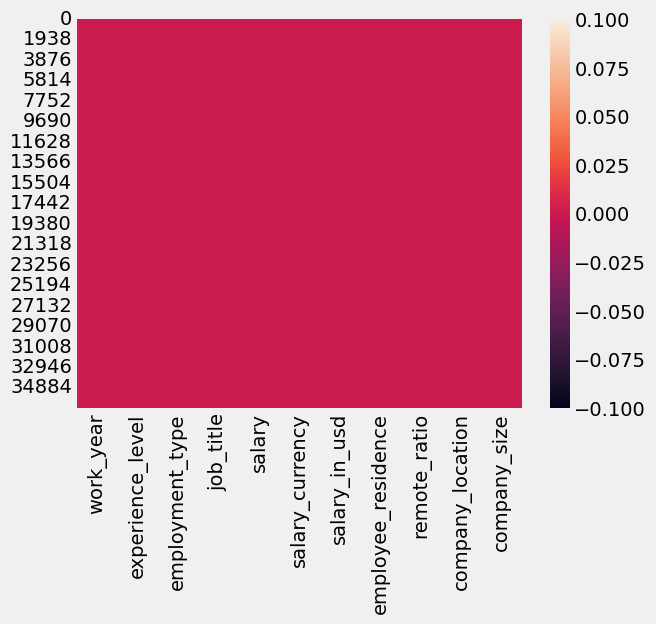

In [13]:
sns.heatmap(df.isnull()) # using heatmap to show if there are any null values visually

> * From the above output we can see that there are no missing values.

#### 3.2.2 Are there any duplicate rows? ####

In [14]:
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f'Number of duplicate rows:', num_duplicates, "Percentage from the total:", round(num_duplicates/len(df),3)*100)

Number of duplicate rows: 17943 Percentage from the total: 48.699999999999996


> * **Note:** The data set contains 17943 duplicates, representing 48.699% of the data set. I have chosen to retain these duplicates, as they appear to represent different entries from the dataset with identical responses. This is plausible, as specific positions/roles may have identical work settings and salaries within a given country.

#### 3.2.3 Drop salary and salary currency columns ####

Since these two columns will not contribute to any analysis, we will remove them from the dataset.

In [15]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

## 4. Salary Analysis ##

#### 4.0 Graphs and Charts Preparation ####

In [16]:
# Template to create efficient and meaningful charts and graphs.

def drawBar(data, title, xltitle, yltitle, kind='barh'):
    plt.figure(figsize=(16, 5))

    # Create the bar plotter
    data.plot(kind=kind, color='lightblue', edgecolor='black')

    # Adding title and labels
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(xltitle, fontsize=20)
    plt.ylabel(yltitle, fontsize=14)
  
    # Customizing ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adding grid lines
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Removing frame around the plot
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Show plot
    plt.tight_layout()
    plt.show()

#### 4.1 Describe Salaries in USD ####

In [17]:
df['salary_in_usd'].describe()

count     36809.000000
mean     160530.633622
std       72692.090281
min       15000.000000
25%      110000.000000
50%      150000.000000
75%      200000.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

#### 4.2 What is the distribution of salaries in USD? ####

**Explanation:**

The histogram and box plot below visualizes the distribution of salaries, showing how salaries are spread across different ranges. Adding a Kernel Density Estimate (KDE) provides a smoothed curve to better understand the distribution's shape. The boxplot can be used to identify any skewness or outliers in the data.

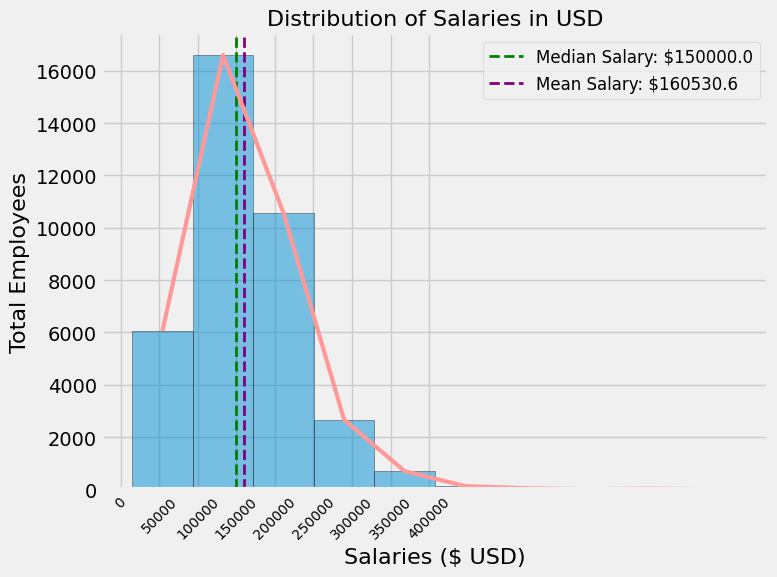

In [18]:
fig = plt.figure(figsize=(8, 6))  # Increase the figure size for more space
n, bins, patches = plt.hist(df['salary_in_usd'], edgecolor='black', alpha=0.5)
median_salary = df['salary_in_usd'].median()
mean_salary = df['salary_in_usd'].mean()

plt.axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median Salary: ${median_salary:.1f}')
plt.axvline(mean_salary, color='purple', linestyle='--', linewidth=2, label=f'Mean Salary: ${mean_salary:.1f}')
plt.legend(fontsize=12)

# Set x-ticks with rotation for better readability
plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000], rotation=45, fontsize=10)

# Adding title and labels
plt.title('Distribution of Salaries in USD', fontsize=16)
plt.xlabel('Salaries ($ USD)', fontsize=16)
plt.ylabel('Total Employees', fontsize=16)

# Density curve
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, n, linewidth=3, color='#ff9999')

# Show plot
plt.tight_layout()
plt.show()

> * Most of the salaries are centered around 142k USD.
> * Most of the salaries are also between 50k and 250k USD.
> * the distribution is approximately normal; however, it is slightly skewed to the right.

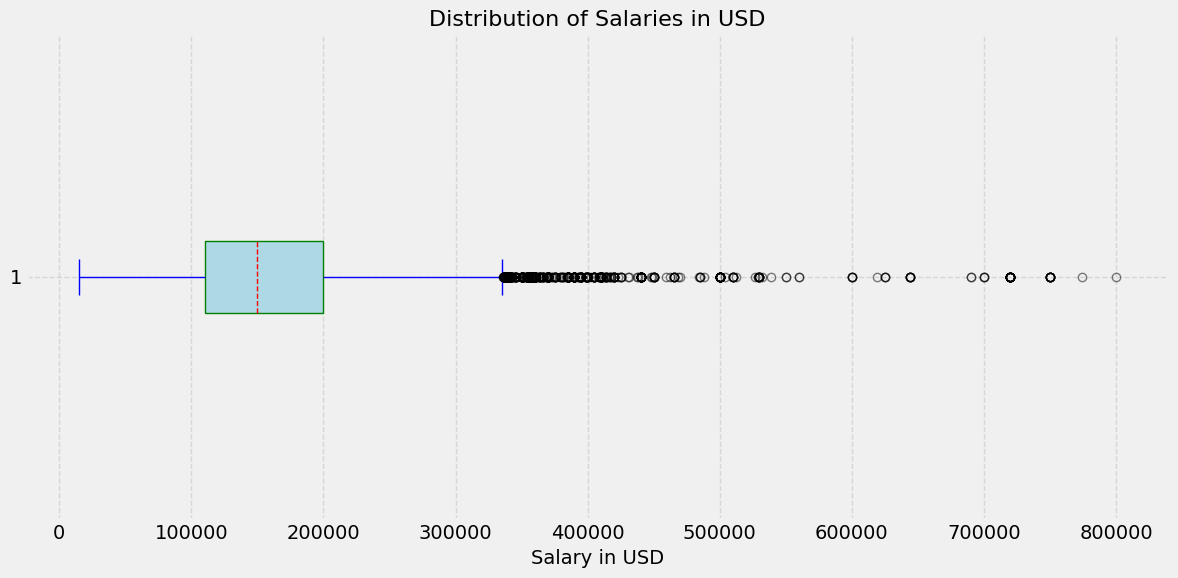

In [19]:
# Increase the figure size for more space
plt.figure(figsize=(12, 6))  

# Create the box plot
plt.boxplot(df['salary_in_usd'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='green'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linestyle='--'),
            flierprops=dict(marker='o', color='red', alpha=0.5))

# Adding title and labels
plt.title('Distribution of Salaries in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

> * The distribution of salaries in USD, shown as a box plot, showcases potential outliers that are outside of the median and mean distribution of salaries.
> * As mentioned in the bar chart, the median salary was 142K. The lower and higher quantiles are shown respectively as the border of the box, with the extreme percentiles of the salaries are shown as dark blue lines.
> * The potential outliers are all higher salaries than what is mostly shown from the input file.

#### 4.2.1 Changing the salary of the previous outlier with the median salary for Entry-level roles of Research Engineers ####

In [20]:
# Step 1: Convert the 'salary_in_usd' column to float64 to handle the float assignment
df['salary_in_usd'] = df['salary_in_usd'].astype('float64')

# Step 2: Define a method to detect outliers (e.g., using IQR method)
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outlier = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]

# Step 3: Filter rows where job_title is 'Research Engineer'
avg_salary_research_eng = df[df['job_title'] == 'Research Engineer']['salary_in_usd'].mean()

# Step 4: Replace outliers in 'salary_in_usd' with the average salary for 'Research Engineer'
df.loc[outlier.index, 'salary_in_usd'] = avg_salary_research_eng

# Verify changes
df.loc[outlier.index]


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
121,2024,MI,FT,Product Manager,202884.162393,US,0,US,M
189,2024,SE,FT,Software Engineer,202884.162393,US,0,US,M
245,2024,SE,FT,Engineering Manager,202884.162393,US,0,US,M
255,2024,SE,FT,Research Engineer,202884.162393,US,0,US,M
256,2024,SE,FT,Research Engineer,202884.162393,US,0,US,M
...,...,...,...,...,...,...,...,...,...
36539,2022,SE,FT,Applied Data Scientist,202884.162393,US,100,US,L
36591,2020,MI,FT,Research Scientist,202884.162393,US,0,US,M
36736,2021,EX,CT,Principal Data Scientist,202884.162393,US,100,US,S
36801,2021,MI,FT,Applied Machine Learning Scientist,202884.162393,US,50,US,L


**Explanation:**

> **Outlier Detection:** The Interquartile Range (IQR) method is used to identify outliers. Salaries beyond 1.5 times the IQR above the third quartile are considered outliers.

> **Handling Outliers:** Outliers are replaced with the median salary to mitigate their impact on analysis. This approach helps in maintaining a more stable representation of the salary distribution without extreme values skewing the results.

#### 4.3 What is the distribution of salaries in USD by company size? ####

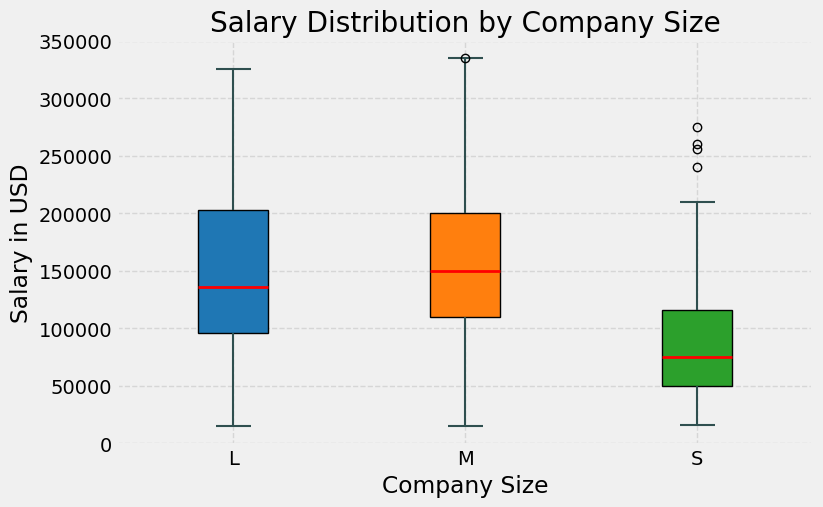

In [21]:
# Group salaries by company size
salary_per_company_size = df.groupby('company_size')['salary_in_usd'].apply(list)

# Extract company sizes and corresponding salary lists
company_sizes = salary_per_company_size.index
salaries = salary_per_company_size.values

# Create a box plot
plt.figure(figsize=(8, 5))
box = plt.boxplot(salaries, tick_labels=company_sizes, patch_artist=True)

# Set colors (list of colors for each box)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize whiskers, caps, and medians
for whisker in box['whiskers']:
    whisker.set(color='#2f4f4f', linewidth=1.5)
for cap in box['caps']:
    cap.set(color='#2f4f4f', linewidth=1.5)
for median in box['medians']:
    median.set(color='red', linewidth=2)

# Customize the plot
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


> * Large and medium sized companies have a larger interquartile range of salaries compared to their small sized company counterparts.
> * More outliers are shown in smaller companies. Some companies may go beyond the range of salaries that most companies in this quartile range currently produce.

#### 4.4 How do salaries differ by company size? ####

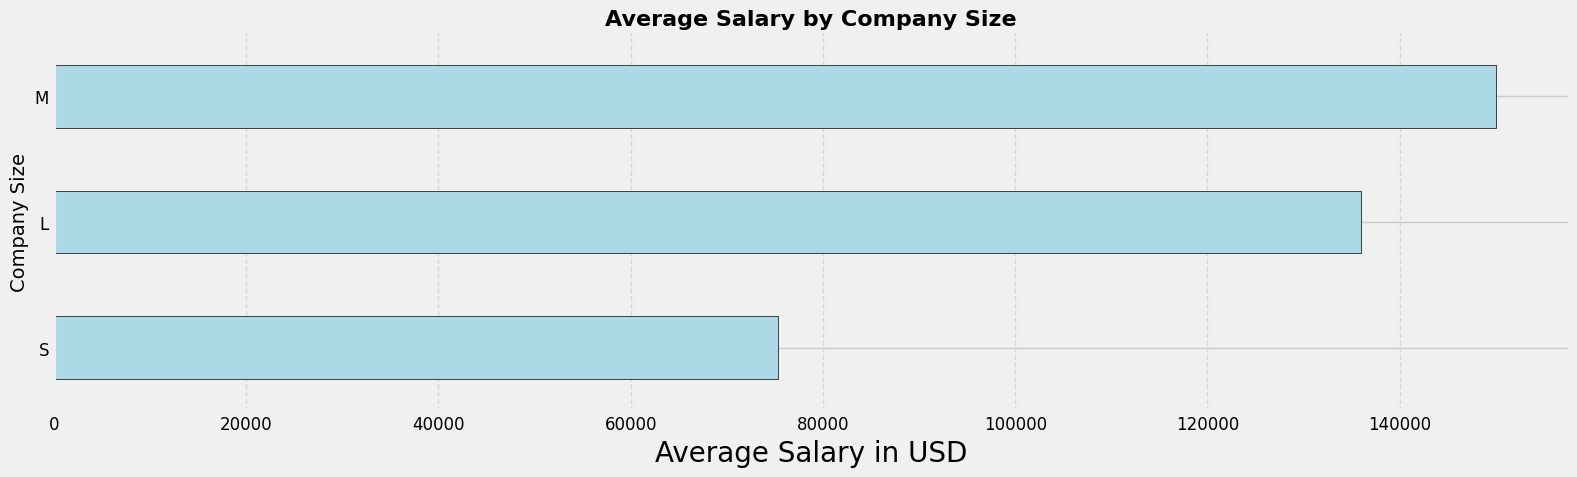

In [22]:
# Group Average Salaries by company size
avg_salary_per_company_size = df.groupby('company_size')['salary_in_usd'].median().sort_values()
drawBar(avg_salary_per_company_size, 'Average Salary by Company Size', 'Average Salary in USD', 'Company Size', 'barh')

> * Medium-sized companies pay more than large and small-sized companies with an average salary of 144000 USD.

## 4.6 What is the average salary in USD each year? ##

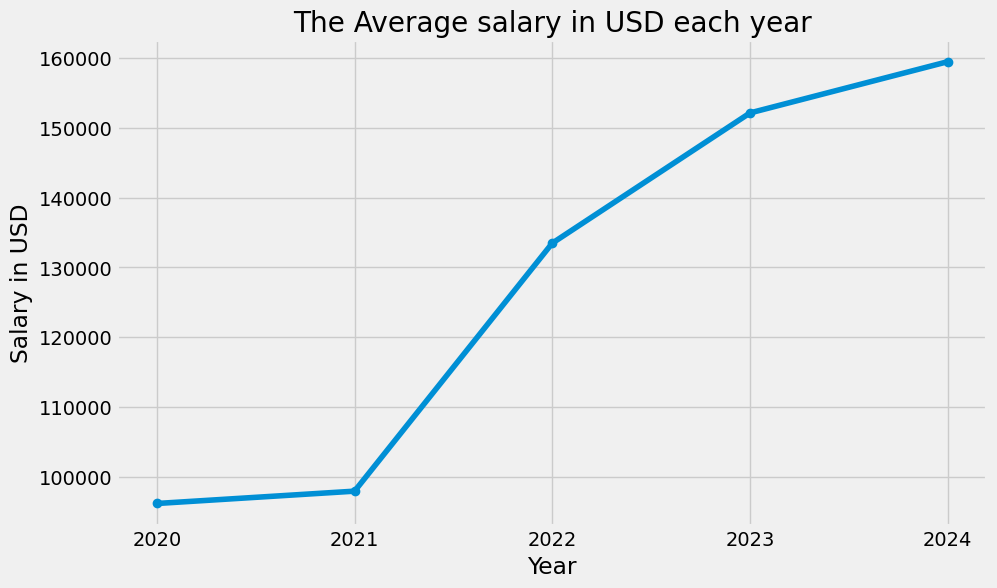

In [23]:
avg_salary_ber_year = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_salary_ber_year.index, avg_salary_ber_year.values, marker='o', linestyle='-')
plt.xticks([2020,2021,2022,2023,2024])
plt.title('The Average salary in USD each year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()


## 4.7 What is the salary growth rate? ##

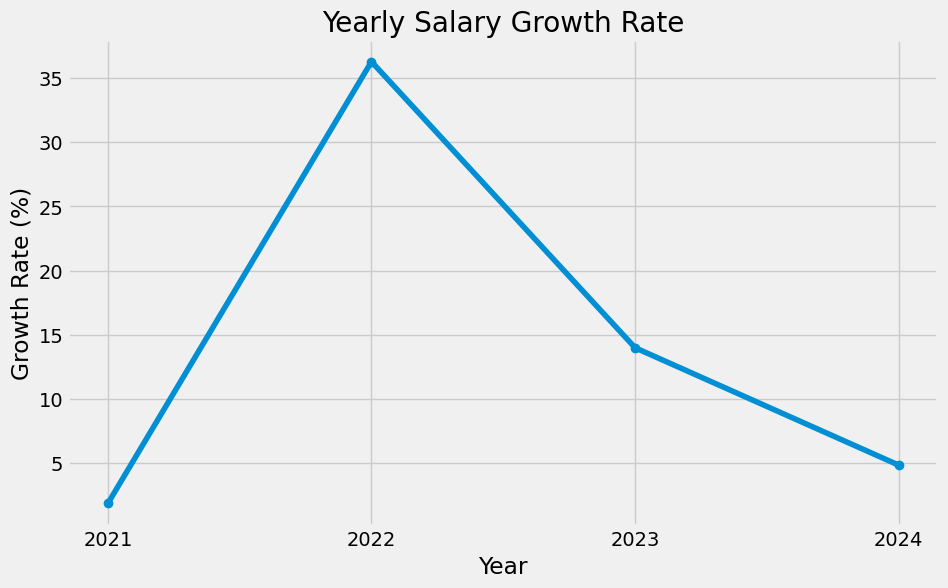

In [24]:
salary_growth_rate = avg_salary_ber_year.pct_change()*100

plt.figure(figsize=(10, 6))
plt.plot(salary_growth_rate.index, salary_growth_rate.values, marker='o', linestyle='-')
plt.xticks([2021,2022,2023,2024])

plt.title('Yearly Salary Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

## 4.8 What is the average salary in USD?

In [25]:
int(df['salary_in_usd'].median())

150000

> * Since the distribution of the data is skewed to the right we used the **median** as an average.

## 5. Geographical Analysis ##

#### 5.1 Employee Residence ####

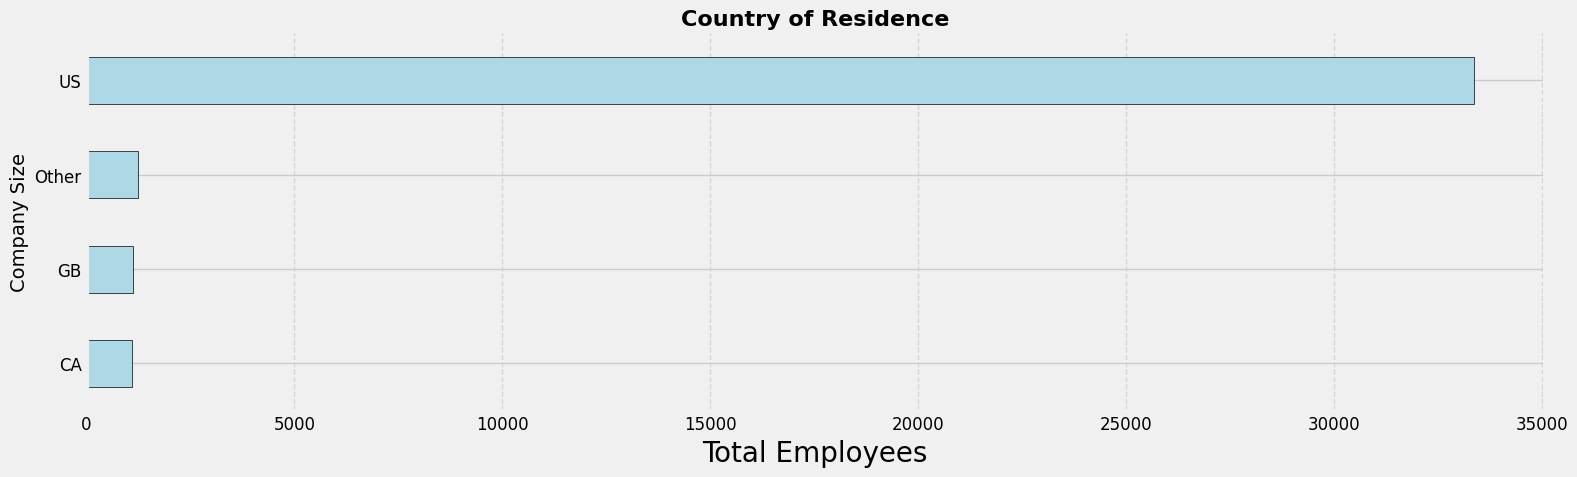

In [26]:
# Top 3 Employees Residence
top_employee_residence = df['employee_residence'].value_counts().sort_values(ascending=True).tail(3)
# Other employees Residence 
flt = df['employee_residence'].isin(list(top_employee_residence.index))
other_employee_residence = pd.Series(df[~flt]['employee_residence'].value_counts().sum(), index=['Other'])

# Concat the top 3 employees residence with the other employees residence
employee_residence = pd.concat([top_employee_residence, other_employee_residence]).sort_values()


drawBar(employee_residence, 'Country of Residence', 'Total Employees', 'Company Size', 'barh')


> * The table presented above shows that the United States is the most frequent employee's country of residence, being 87.8% of the total. 
> * The 'employee_residence' is one of the most inbalanced feature in the dataset.

## 6. Employment and Work Setting Analysis ##

#### 6.1 How does the type of employment affect salaries? ####

In [27]:
df_grouped = df.groupby('employment_type')['salary_in_usd'].agg(['mean', 'median', 'std', 'count']).sort_values('mean').reset_index()
df_grouped
                                                            

,employment_type,mean,median,std,count
0,FL,49220.857143,47777.5,24997.262711,14
1,PT,81889.733892,60781.0,58080.720281,52
2,CT,107135.092498,105000.0,62230.008862,45
3,FT,156303.896042,150000.0,61861.046987,36698


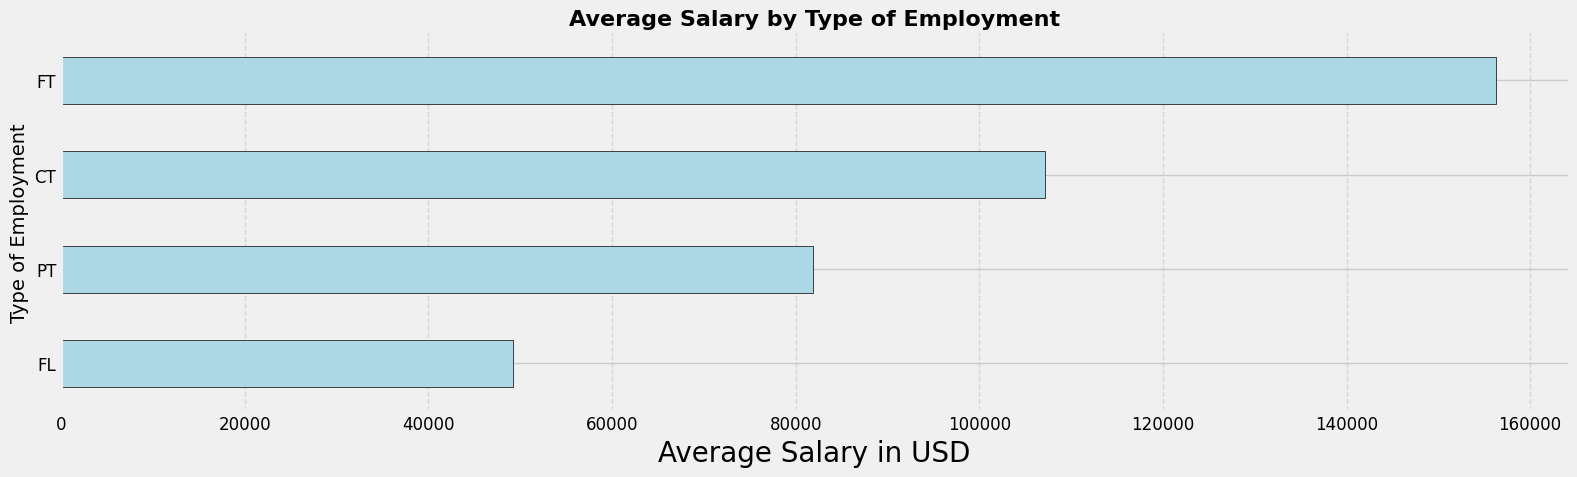

In [28]:
df_grouped = df.groupby('employment_type')['salary_in_usd'].mean().sort_values()
drawBar(df_grouped, 'Average Salary by Type of Employment', 'Average Salary in USD', 'Type of Employment')


#### 6.3 What is the company location for the highest paid person? ####

In [29]:
flt = df['salary_in_usd'] == df['salary_in_usd'].max()
df.loc[flt]['company_location'].unique()

array(['US'], dtype=object)

> * The file mentions the state where the company is located at, and California is where that company is located.

## 7. Job Title Analysis ##

#### 7.1 What is the salary growth for the top 10 job categories based on AVG salaries? ####

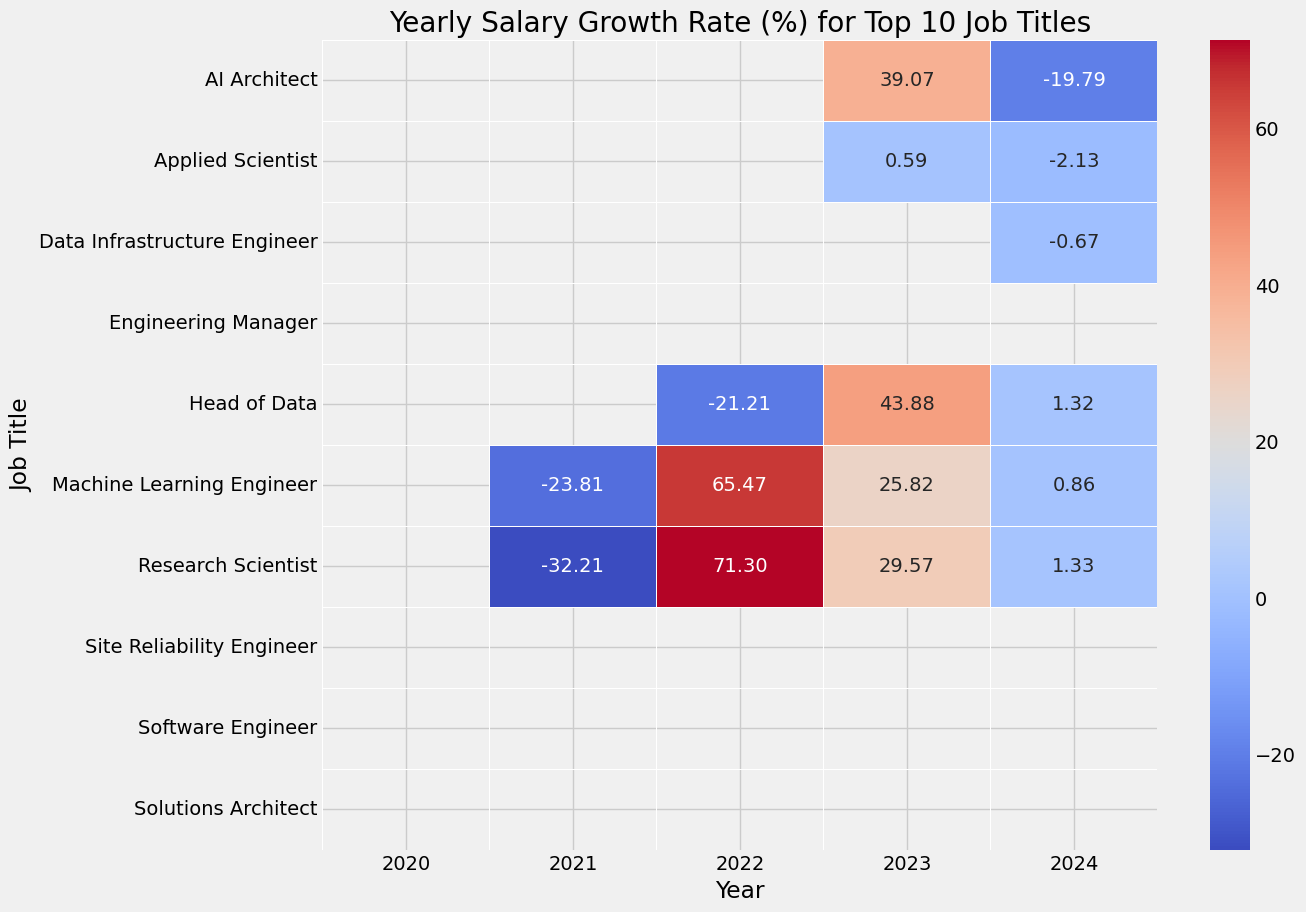

In [30]:
# Deleting job categories that have less than 20 observations
flt = df['job_title'].value_counts() < 30
flt_job_categories = flt[flt == False].index.tolist()
df_flt_job_categories = df[df['job_title'].isin(flt_job_categories)]

# Calculate the yearly salary growth of the top 10 job titles
average_salary_by_categories = df_flt_job_categories.groupby('job_title')['salary_in_usd'].mean()
top_10_job_categories = average_salary_by_categories.sort_values(ascending=False).head(10).index
df_top_10 = df[df['job_title'].isin(top_10_job_categories)]
average_salary_per_year_categories = df_top_10.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().unstack()
average_salary_per_year_categories
salary_growth_rate_categories = average_salary_per_year_categories.pct_change() * 100

# Draw Heatmap for the yearly salary growth of the top 10 job titles
plt.figure(figsize=(12, 10))
sns.heatmap(salary_growth_rate_categories.T, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Yearly Salary Growth Rate (%) for Top 10 Job Titles')
plt.ylabel('Job Title')
plt.xlabel('Year')
plt.show()

> * Machine Learning and AI saw the highest salary growth, peaking at 42.30% in 2022, indicating high demand.
> * Data Analysis showed strong growth in 2020 and 2021, underscoring its importance.
> * Data Management and Strategy experienced consistent declines, suggesting shifts in industry focus.

#### 7.1 What are the most common job titles in the dataset? ####

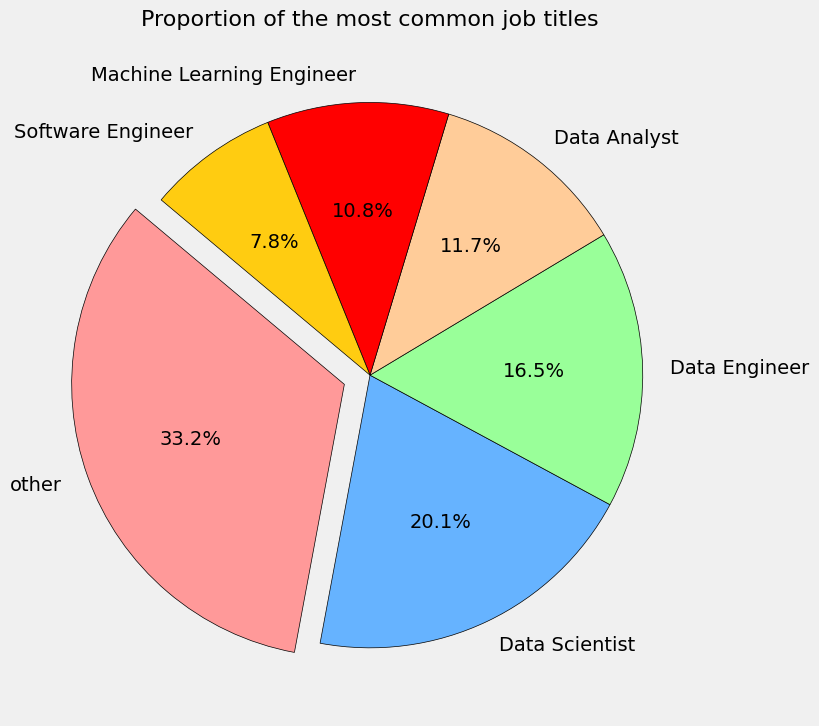

In [31]:
top_five_common_job_titles = df['job_title'].value_counts().sort_values(ascending=False).head(5)

flt = df['job_title'].isin(top_five_common_job_titles.index)
other_job_titles = pd.Series(df[~flt]['job_title'].value_counts().sum(), index=['other'])


job_titles = pd.concat([other_job_titles, top_five_common_job_titles])

# Colors for each slice
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'red', '#ffcc11']

# Explode effect to highlight the largest slice
explode = [0.1, 0, 0, 0, 0, 0]  # '0.1' slightly separates the second slice

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_titles.values, labels=job_titles.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})

# Customize the title and layout
plt.title('Proportion of the most common job titles', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

> * Data Engineer is the most common job title with a proportion of 21%, followed by Data Scientist and Data Analyst job title with proportion of 20.5% and 14.9% respectively.
> * The proportion of 29.4% isdistributed over the other 144 job titles.

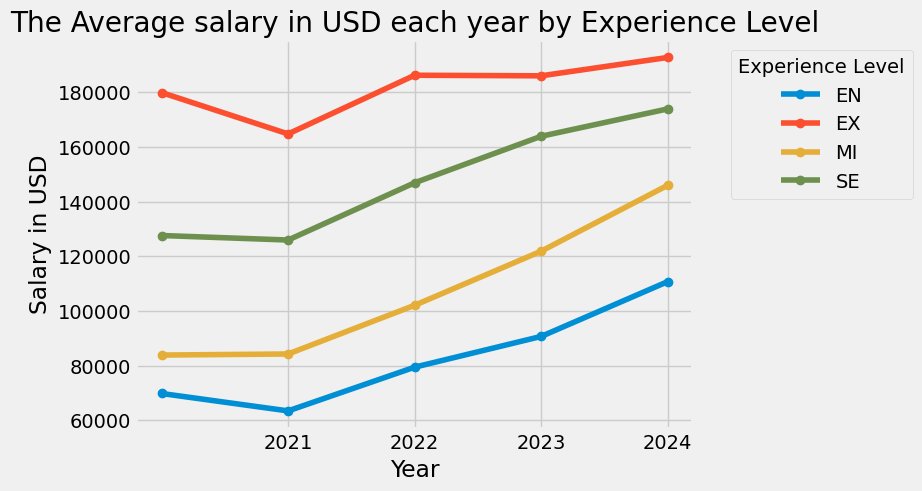

In [32]:
exp_level_salaries = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack()
plt.plot(exp_level_salaries.index, exp_level_salaries.values, label=exp_level_salaries.columns, marker='o', linestyle='-')
plt.xticks([2021,2022,2023,2024])

plt.title('The Average salary in USD each year by Experience Level')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 8. Conclusion and Insights #

**Summarize Key Findings:**
- **Job Titles and Salaries:** The analysis reveals that Data Scientists tend to have the highest average salaries among data-related roles, significantly outpacing roles such as Data Analysts and Business Intelligence Analysts. For example, Data Scientists on average earn 20% more than Data Analysts, highlighting the premium placed on the specialized skills required for this role.
  
- **Company Size:** The data indicates that larger companies, particularly those with over 500 employees, offer higher salaries compared to smaller firms. However, there is a notable exception where some mid-sized companies (100-500 employees) offer competitive salaries, likely due to their need to attract specialized talent in a competitive market.

- **Remote Work Impact:** Remote roles, while offering flexibility, tend to have slightly lower average salaries compared to on-site roles. The difference, though modest (around 5%), suggests that while remote work offers benefits in terms of work-life balance, it may come with a slight trade-off in salary.

**Actionable Insights:**
- **Career Path Recommendations:** For professionals entering the data science field or looking to switch roles, targeting positions as Data Scientists or Machine Learning Engineers may be particularly lucrative. These roles not only offer higher salaries but also align with the growing demand for advanced data analytics and AI-driven solutions.

- **Negotiation Strategies:** When negotiating salaries, candidates should be aware of the slight salary premium associated with on-site roles. If preferring a remote position, it may be beneficial to negotiate for additional perks such as flexible working hours, health benefits, or professional development opportunities to offset the slightly lower salary.

- **Market Trends:** The analysis suggests a trend towards higher salaries in larger organizations, possibly due to their greater financial resources and the complexity of their data needs. Additionally, the rise of remote work, while still paying slightly less, indicates a shift towards more flexible working arrangements, which could reshape future salary structures.

**Future Analysis:**
- Further exploration could involve analyzing the impact of educational background and certifications on salary levels within the data science field. Additionally, examining salary trends over time could provide insights into how economic conditions or technological advancements influence pay scales. Another area of interest could be the role of geographic location, particularly in the context of remote work, to understand how regional salary differences are evolving.


# Thank you! #

Thank you for exploring this project. I hope you found the insights and analyses valuable. If you have any questions or suggestions, please feel free to reach out. Your feedback is important to me and helps in refining my work. For any further discussion or collaboration, don’t hesitate to contact me via:

> * [Email](adthai.me@gmail.com)
> * [Phone](2064277175)
> * [LinkedIn](https://www.linkedin.com/in/adthai01/)